## **Importing Data**


In [257]:
################### Importing Libraries ######################
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data
import seaborn as sns  #plot the graph of the data set
from sklearn import metrics  # transforming the data in to the metrics
from sklearn.preprocessing import LabelEncoder


In [258]:
dataframe = pd.read_csv('/train.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [259]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data pre-processing & :Data Visualisation**
---

In [261]:
dataframe.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

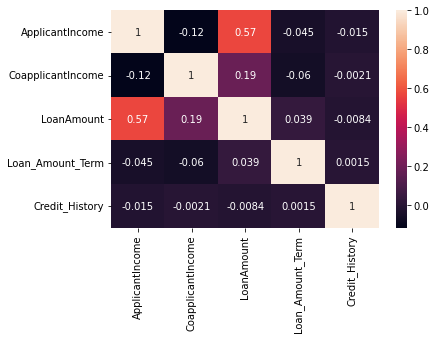

In [262]:
sns.heatmap(dataframe.corr(),annot=True)

In [263]:
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [264]:
cat_f = dataframe.select_dtypes(include='object')
categorical_cols = list(cat_f.columns.values.tolist())
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [265]:
input_col = list(dataframe.columns)[1:8] + list(dataframe.columns)[9:]
input_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [266]:
train_df = dataframe.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


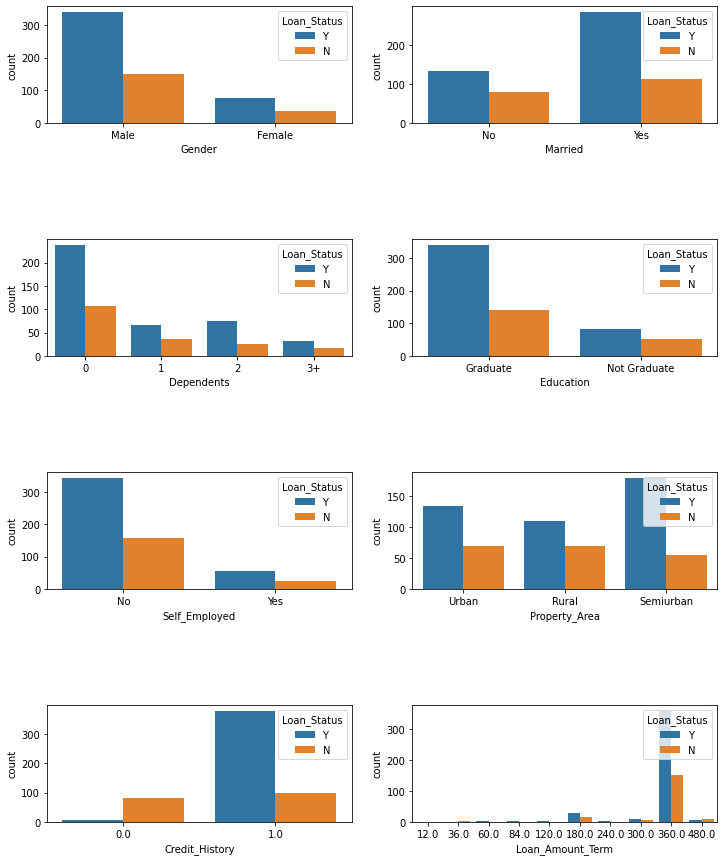

In [267]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=dataframe,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


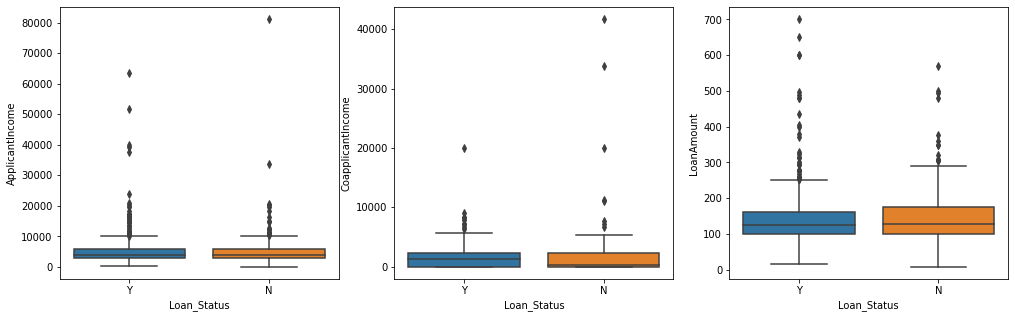

In [268]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=dataframe,x='Loan_Status',ax=axes[idx])

print(dataframe[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [269]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [270]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [271]:
output_col = ['LoanAmount']

## **Prepare the dataset for training**

In [272]:
dataframe1 = dataframe.copy(deep=True).dropna()
for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
inputs_array = dataframe1.drop(['Loan_ID', 'LoanAmount' ], axis=1)
targets_array = dataframe1[['LoanAmount']].values
mean = inputs_array.mean()
dev = inputs_array.std()
inputs_array = (inputs_array - mean) / dev
inputs_array = inputs_array.values
inputs_array.shape, targets_array.shape

((480, 11), (480, 1))

In [273]:
inputs_array

array([[ 0.46671123,  0.73639409,  0.21837135, ...,  0.4127663 ,
        -1.3174938 , -1.49618509],
       [ 0.46671123,  0.73639409, -0.76123846, ...,  0.4127663 ,
         1.2584615 ,  0.66697408],
       [ 0.46671123,  0.73639409, -0.76123846, ...,  0.4127663 ,
         1.2584615 ,  0.66697408],
       ...,
       [ 0.46671123,  0.73639409,  0.21837135, ...,  0.4127663 ,
         1.2584615 ,  0.66697408],
       [ 0.46671123,  0.73639409,  1.19798116, ...,  0.4127663 ,
         1.2584615 ,  0.66697408],
       [-2.13818867, -1.35513942, -0.76123846, ..., -2.41763117,
        -0.02951615, -1.49618509]])

In [274]:
num_rows = dataframe1.shape[0]
print(num_rows)

480


In [275]:
inputs = torch.from_numpy(inputs_array).float() 
targets = torch.from_numpy(targets_array).float()

In [276]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [277]:
inputs.size(), targets.size()

(torch.Size([480, 11]), torch.Size([480, 1]))

In [278]:
dataset = TensorDataset(inputs, targets)

In [279]:
val_percent = 0.15 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length
len(train_ds), len(val_ds)

(408, 72)

In [280]:
batch_size = 11

In [281]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
print(len(train_ds), len(val_ds))

408 72


In [282]:
print(len(input_col))

11


## **Create a Linear Regression Model**

In [283]:
input_size, output_size

(10, 1)

In [284]:
class LoanModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(11, 1)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                        # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                        # fill this
        return {'val_loss': loss}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))


In [285]:
model = LoanModel()
model

LoanModel(
  (linear): Linear(in_features=11, out_features=1, bias=True)
)

In [286]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0207,  0.1174, -0.0116, -0.0408,  0.1101, -0.0382, -0.0634, -0.2874,
          -0.0678,  0.2341,  0.2302]], requires_grad=True),
 Parameter containing:
 tensor([0.1997], requires_grad=True)]

# **Train the model to fit the data**

In [287]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [288]:
result = evaluate(model, val_loader) # Use the the evaluate function
result

{'val_loss': 135.57437133789062}

In [289]:
epochs = 125
lr = 1e-1
history0 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 68.2078
Epoch [40], val_loss: 38.8048
Epoch [60], val_loss: 37.1672
Epoch [80], val_loss: 39.6272
Epoch [100], val_loss: 41.4962
Epoch [120], val_loss: 43.1303
Epoch [125], val_loss: 43.5653


In [290]:
epochs = 25
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.7545
Epoch [25], val_loss: 43.8008


In [291]:
epochs = 25
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8187
Epoch [25], val_loss: 43.8233


In [292]:
epochs = 100
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8250
Epoch [40], val_loss: 43.8271
Epoch [60], val_loss: 43.8290
Epoch [80], val_loss: 43.8308
Epoch [100], val_loss: 43.8324


In [293]:
epochs = 100
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8325
Epoch [40], val_loss: 43.8327
Epoch [60], val_loss: 43.8329
Epoch [80], val_loss: 43.8330
Epoch [100], val_loss: 43.8332


In [294]:
epochs = 200
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8332
Epoch [40], val_loss: 43.8332
Epoch [60], val_loss: 43.8332
Epoch [80], val_loss: 43.8332
Epoch [100], val_loss: 43.8332
Epoch [120], val_loss: 43.8332
Epoch [140], val_loss: 43.8332
Epoch [160], val_loss: 43.8332
Epoch [180], val_loss: 43.8332
Epoch [200], val_loss: 43.8332


In [295]:
epochs = 200
lr = 1e-7
history6 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8332
Epoch [40], val_loss: 43.8332
Epoch [60], val_loss: 43.8332
Epoch [80], val_loss: 43.8332
Epoch [100], val_loss: 43.8332
Epoch [120], val_loss: 43.8332
Epoch [140], val_loss: 43.8332
Epoch [160], val_loss: 43.8332
Epoch [180], val_loss: 43.8332
Epoch [200], val_loss: 43.8332


In [296]:
epochs = 400
lr = 1e-8
history7 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8332
Epoch [40], val_loss: 43.8332
Epoch [60], val_loss: 43.8332
Epoch [80], val_loss: 43.8332
Epoch [100], val_loss: 43.8332
Epoch [120], val_loss: 43.8332
Epoch [140], val_loss: 43.8332
Epoch [160], val_loss: 43.8332
Epoch [180], val_loss: 43.8332
Epoch [200], val_loss: 43.8332
Epoch [220], val_loss: 43.8332
Epoch [240], val_loss: 43.8332
Epoch [260], val_loss: 43.8332
Epoch [280], val_loss: 43.8332
Epoch [300], val_loss: 43.8332
Epoch [320], val_loss: 43.8332
Epoch [340], val_loss: 43.8332
Epoch [360], val_loss: 43.8332
Epoch [380], val_loss: 43.8332
Epoch [400], val_loss: 43.8332


In [297]:
epochs = 400
lr = 1e-9
history8 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 43.8332
Epoch [40], val_loss: 43.8332
Epoch [60], val_loss: 43.8332
Epoch [80], val_loss: 43.8332
Epoch [100], val_loss: 43.8332
Epoch [120], val_loss: 43.8332
Epoch [140], val_loss: 43.8332
Epoch [160], val_loss: 43.8332
Epoch [180], val_loss: 43.8332
Epoch [200], val_loss: 43.8332
Epoch [220], val_loss: 43.8332
Epoch [240], val_loss: 43.8332
Epoch [260], val_loss: 43.8332
Epoch [280], val_loss: 43.8332
Epoch [300], val_loss: 43.8332
Epoch [320], val_loss: 43.8332
Epoch [340], val_loss: 43.8332
Epoch [360], val_loss: 43.8332
Epoch [380], val_loss: 43.8332
Epoch [400], val_loss: 43.8332


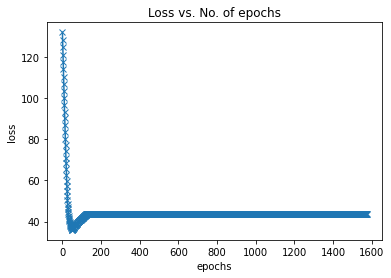

In [298]:
history = history0 + history1 + history2 + history3 + history4 + history5 + history6 + history7 + history8
loss = [result['val_loss'] for result in history]
plt.plot(loss, '-x')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [299]:
val_loss = 31.4945

# **Make predictions using the trained model** *italicized text*

In [300]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [301]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([-2.1382,  0.7364, -0.7612, -0.5027, -0.3989, -0.5189, -0.4111,  0.2753,
         0.4128, -0.0295,  0.6670])
Target: tensor([130.])
Prediction: tensor([102.0829])


In [302]:
input, target = val_ds[25]
predict_single(input, target, model)

Input: tensor([ 0.4667,  0.7364, -0.7612, -0.5027, -0.3989, -0.4171,  0.7010, -2.4850,
         0.4128, -0.0295,  0.6670])
Target: tensor([56.])
Prediction: tensor([129.9852])


In [303]:
input, target = val_ds[32]
predict_single(input, target, model)

Input: tensor([ 0.4667,  0.7364, -0.7612, -0.5027, -0.3989, -0.2419,  0.6467,  0.2753,
         0.4128, -0.0295,  0.6670])
Target: tensor([207.])
Prediction: tensor([149.3882])
